In [1]:
!pip install ninja

     |████████████████████████████████| 108 kB 16.6 MB/s 


In [2]:
!pip install clip-by-openai

     |████████████████████████████████| 1.4 MB 14.7 MB/s 
     |████████████████████████████████| 776.8 MB 17 kB/s 
     |████████████████████████████████| 64 kB 3.9 MB/s 
     |████████████████████████████████| 12.8 MB 62.8 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=30c9c8276837f4928d0ce10864253174b406f5e633695c4fd03cba8e6c1f693b
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the s

In [3]:
!git clone https://github.com/happy-jihye/Cartoon-StyleGAN.git

Cloning into 'Cartoon-StyleGAN'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 162 (delta 23), reused 30 (delta 11), pack-reused 110
Receiving objects: 100% (162/162), 128.89 MiB | 23.85 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [4]:
cd Cartoon-StyleGAN

/content/Cartoon-StyleGAN


In [ ]:
from google.colab import files
uploaded = files.upload()
image_name = list(uploaded.keys())[0]
image_name = image_name.split('.')

TypeError: ignored

In [ ]:
from PIL import Image

im = Image.open("/content/Cartoon-StyleGAN/example.jpg")
print(im.size)
im = im.resize((256,256))
im.save("/content/Cartoon-StyleGAN/example.jpg")

(1125, 1125)


In [ ]:
!mkdir networks

In [ ]:
cd networks

/content/Cartoon-StyleGAN/networks


In [ ]:
!ls

In [ ]:
!gdown --id 11cjFOpjCosJ8zciZK_1JHbpBu0zOTO2C
!gdown --id 1RJKZzLosKrJbtoxKWSpI0dIpQXrnPMr5

Downloading...
From: https://drive.google.com/uc?id=11cjFOpjCosJ8zciZK_1JHbpBu0zOTO2C
To: /content/Cartoon-StyleGAN/networks/000000.pt
100% 829M/829M [00:04<00:00, 186MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RJKZzLosKrJbtoxKWSpI0dIpQXrnPMr5
To: /content/Cartoon-StyleGAN/networks/encoder_000000.pt
100% 1.26G/1.26G [00:08<00:00, 152MB/s] 


In [ ]:
cd ..

/content/Cartoon-StyleGAN


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
#Project your own image and Make Eigenvector of latent spaces (by pretrained model)

!python projector.py --ckpt=/content/Cartoon-StyleGAN/networks/000000.pt --factor='networks/factor' --e_ckpt=/content/Cartoon-StyleGAN/networks/encoder_000000.pt \
                            --files=/content/Cartoon-StyleGAN/example.jpg 

Setting up Perceptual loss...
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100% 528M/528M [00:04<00:00, 118MB/s]
Loading model from: /content/Cartoon-StyleGAN/lpips/weights/v0.1/vgg.pth
...[net-lin [vgg]] initialized
...Done
perceptual: 0.3710; noise regularize: 0.0760; reconstruction: 0.0286; mse_img: 0.0286; mse_latent: 0.0008; lr: 0.0000 |: 100% 1000/1000 [02:04<00:00,  8.02it/s]


In [ ]:
import torch

project = torch.load("/content/Cartoon-StyleGAN/project.pt")
project_result = project[image_name[0]]['latent']
torch.save(project_result, '/content/Cartoon-StyleGAN/latent.pt')

project = torch.load('/content/Cartoon-StyleGAN/latent.pt').cuda()
print(project.shape)

torch.Size([1, 14, 512])


In [ ]:
cd networks

/content/Cartoon-StyleGAN/networks


In [ ]:
!gdown --id 1e4vcMDm0xglI8snGtFXmQgGAmZivD3Lq

Downloading...
From: https://drive.google.com/uc?id=1e4vcMDm0xglI8snGtFXmQgGAmZivD3Lq
To: /content/Cartoon-StyleGAN/networks/Disney_FreezeSG.pt
100% 829M/829M [00:05<00:00, 155MB/s]


In [ ]:
cd ..

/content/Cartoon-StyleGAN


In [ ]:
seed = 356289 

target_network = 'Disney_FreezeSG' 
description = 'smiling face' 

latent_path = "/content/Cartoon-StyleGAN/latent.pt" 

optimization_steps = 300 

l2_lambda = 0.004 

create_video = False 

result_dir = "asset/results3" 
device = 'cuda'

# -----------------------------
args = {
    "seed" : seed,
    "description": description,
    "ckpt": "/content/Cartoon-StyleGAN/networks/000000.pt",
    "ckpt2": f"/content/Cartoon-StyleGAN/networks/{target_network}.pt",
    "stylegan_size": 256,
    "latent_dim" : 14,
    "lr_rampup": 0.05,
    "lr": 0.1,
    "step": optimization_steps,
    "l2_lambda": l2_lambda,
    "latent_path": latent_path,
    "truncation": 0.7,
    "save_intermediate_image_every": 1 if create_video else 20,
    "device" : "cuda",
    "results_dir": result_dir,
}

# -----------------------------

from run_optimization import main
from argparse import Namespace

final_result, latent_init3, latent_fin3 = main(Namespace(**args))


loss: 0.6831;: 100%|██████████| 300/300 [01:13<00:00,  4.10it/s]


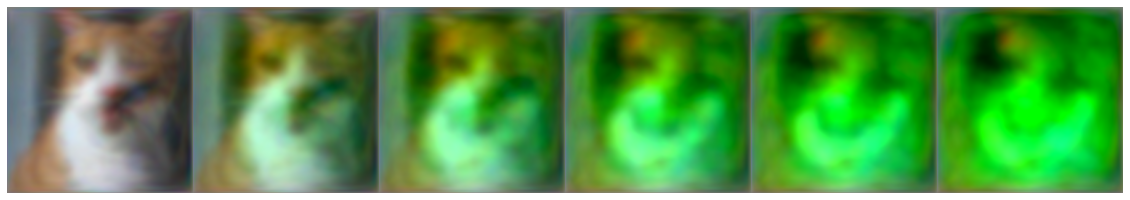

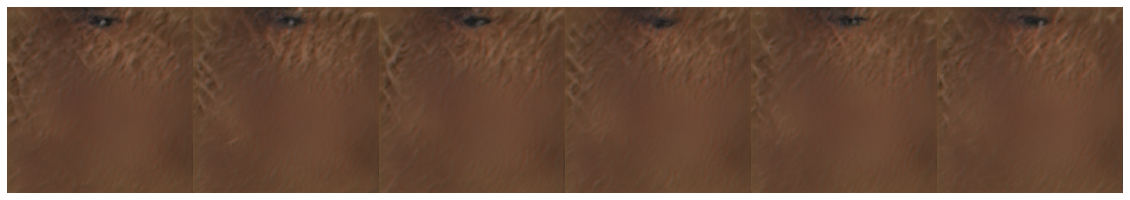

In [ ]:
# -----------------------------

import torch

from model import Generator
from utils import imshow, tensor2image

device = 'cuda'

# ---------------
# Generator
# ---------------

# Generator1
network1='/content/Cartoon-StyleGAN/networks/000000.pt' 
network1 = torch.load(network1)

generator1 = Generator(256, 512, 8, channel_multiplier=2).to(device)
generator1.load_state_dict(network1["g_ema"], strict=False)

trunc1 = generator1.mean_latent(4096)

# Generator2
Target_network = 'Disney_FreezeSG' 
network2=f'/content/Cartoon-StyleGAN/networks/{Target_network}.pt' 
network2 = torch.load(network2)

generator2 = Generator(256, 512, 8, channel_multiplier=2).to(device)
generator2.load_state_dict(network2["g_ema"], strict=False)

trunc2 = generator2.mean_latent(4096)

# ---------------
# Interpolation
# ---------------

number_of_step = 6 
latent_interp = torch.zeros(number_of_step, latent_init3.shape[1], latent_init3.shape[2]).to(device)

sample_z_style = torch.randn(number_of_step, 512, device=device)
strength = 1.5 
swap = True 
swap_layer_num = 2 

with torch.no_grad():
    for j in range(number_of_step):

        latent_interp[j] = latent_init3 + strength * (latent_fin3-latent_init3) * float(j/(number_of_step-1))
        
        imgs_gen1, save_swap_layer = generator1([latent_interp],
                                input_is_latent=True,                                     
                                truncation=0.7,
                                truncation_latent=trunc1,
                                swap=swap, swap_layer_num=swap_layer_num,
                                randomize_noise=False)
        imgs_gen2, _ = generator2([latent_interp],
                                input_is_latent=True,                                     
                                truncation=0.7,
                                truncation_latent=trunc2,
                                swap=swap, swap_layer_num=swap_layer_num, swap_layer_tensor=save_swap_layer,
                                randomize_noise=True,
                                )
imshow(tensor2image(torch.cat([img_gen for img_gen in imgs_gen1], dim=2)), 20)
imshow(tensor2image(torch.cat([img_gen for img_gen in imgs_gen2], dim=2)), 20)